<img width="800px" src="../fidle/img/header.svg"></img>

# <!-- TITLE --> [K3MNIST2] - Simple classification with CNN
<!-- DESC --> An example of classification using a convolutional neural network for the famous MNIST dataset
<!-- AUTHOR : Jean-Luc Parouty (CNRS/SIMaP) -->

## Objectives :
 - Recognizing handwritten numbers
 - Understanding the principle of a classifier DNN network 
 - Implementation with Keras 


The [MNIST dataset](http://yann.lecun.com/exdb/mnist/) (Modified National Institute of Standards and Technology) is a must for Deep Learning.  
It consists of 60,000 small images of handwritten numbers for learning and 10,000 for testing.


## What we're going to do :

 - Retrieve data
 - Preparing the data
 - Create a model
 - Train the model
 - Evaluate the result


## Step 1 - Init python stuff

In [1]:
import os
os.environ['KERAS_BACKEND'] = 'torch'

import keras

import numpy as np
import matplotlib.pyplot as plt
import sys,os
from importlib import reload

# Init Fidle environment
import fidle

run_id, run_dir, datasets_dir = fidle.init('K3MNIST2')

<br>**FIDLE - Environment initialization**

Version              : 2.3.2
Run id               : K3MNIST2
Run dir              : ./run/K3MNIST2
Datasets dir         : /data/datasets-fidle
Start time           : 04/07/24 16:07:54
Hostname             : ebf2030c9b9e (Linux)
Tensorflow log level : Info + Warning + Error  (=0)
Update keras cache   : False
Update torch cache   : False
Save figs            : ./run/K3MNIST2/figs (False)
keras                : 3.0.5
numpy                : 1.26.4
sklearn              : 1.4.1.post1
yaml                 : 6.0.1
matplotlib           : 3.8.3
pandas               : 2.2.1
torch                : 2.2.1+cpu


Verbosity during training : 0 = silent, 1 = progress bar, 2 = one line per epoch

In [2]:
fit_verbosity = 1

Override parameters (batch mode) - Just forget this cell

In [3]:
fidle.override('fit_verbosity')

## Step 2 - Retrieve data
MNIST is one of the most famous historic dataset.  
Include in [Keras datasets](https://keras.io/datasets)

In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(-1,28,28,1)
x_test  = x_test.reshape(-1,28,28,1)

print("x_train : ",x_train.shape)
print("y_train : ",y_train.shape)
print("x_test  : ",x_test.shape)
print("y_test  : ",y_test.shape)

x_train :  (60000, 28, 28, 1)
y_train :  (60000,)
x_test  :  (10000, 28, 28, 1)
y_test  :  (10000,)


## Step 3 - Preparing the data

In [5]:
print('Before normalization : Min={}, max={}'.format(x_train.min(),x_train.max()))

xmax = x_train.max()
x_train = x_train / xmax
x_test  = x_test  / xmax

print('After normalization  : Min={}, max={}'.format(x_train.min(),x_train.max()))

Before normalization : Min=0, max=255


After normalization  : Min=0.0, max=1.0


### Have a look

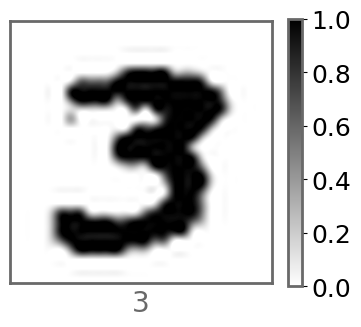

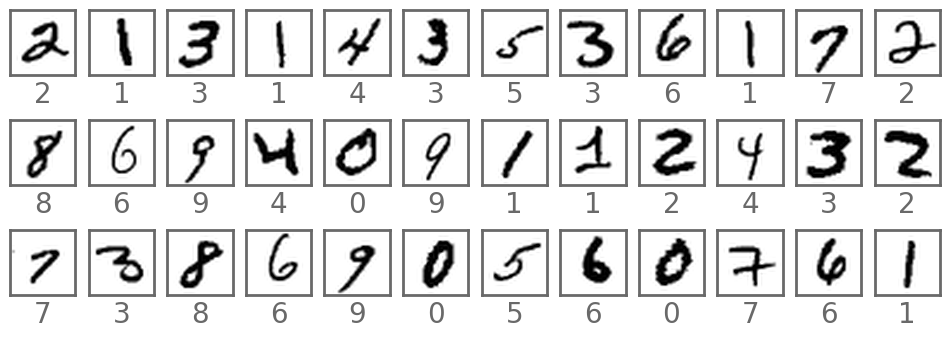

In [6]:
fidle.scrawler.images(x_train, y_train, [27],  x_size=5,y_size=5, colorbar=True, save_as='01-one-digit')
fidle.scrawler.images(x_train, y_train, range(5,41), columns=12, save_as='02-many-digits')

## Step 4 - Create model
About informations about : 
 - [Optimizer](https://keras.io/api/optimizers)
 - [Activation](https://keras.io/api/layers/activations)
 - [Loss](https://keras.io/api/losses)
 - [Metrics](https://keras.io/api/metrics)

In [7]:
model = keras.models.Sequential()

model.add( keras.layers.Input((28,28,1)) )

model.add( keras.layers.Conv2D(8, (3,3),  activation='relu', padding="same", strides=(1,1)) )
model.add( keras.layers.MaxPooling2D((2,2)))
model.add( keras.layers.Dropout(0.2))

model.add( keras.layers.Conv2D(16, (3,3), activation='relu', padding="same", strides=(1,1)) )
model.add( keras.layers.MaxPooling2D((2,2)))
model.add( keras.layers.Dropout(0.2))

model.add( keras.layers.Flatten()) 
model.add( keras.layers.Dense(100, activation='relu'))
model.add( keras.layers.Dropout(0.5))

model.add( keras.layers.Dense(10, activation='softmax'))

In [8]:
model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 80,758 (315.46 KB)

 Trainable params: 80,758 (315.46 KB)

 Non-trainable params: 0 (0.00 B)

## Step 5 - Train the model

In [9]:
batch_size  = 512
epochs      =  16

history = model.fit(  x_train, y_train,
                      batch_size      = batch_size,
                      epochs          = epochs,
                      verbose         = fit_verbosity,
                      validation_data = (x_test, y_test))

Epoch 1/16
118/118 ━━━━━━━━━━━━━━━━━━━━ 15s 128ms/step - accuracy: 0.5100 - loss: 1.4533 - val_accuracy: 0.9319 - val_loss: 0.2587
Epoch 2/16
118/118 ━━━━━━━━━━━━━━━━━━━━ 15s 125ms/step - accuracy: 0.8784 - loss: 0.3843 - val_accuracy: 0.9593 - val_loss: 0.1423
Epoch 3/16
118/118 ━━━━━━━━━━━━━━━━━━━━ 19s 166ms/step - accuracy: 0.9194 - loss: 0.2592 - val_accuracy: 0.9702 - val_loss: 0.1027
Epoch 4/16
118/118 ━━━━━━━━━━━━━━━━━━━━ 15s 124ms/step - accuracy: 0.9364 - loss: 0.2070 - val_accuracy: 0.9739 - val_loss: 0.0830
Epoch 5/16
118/118 ━━━━━━━━━━━━━━━━━━━━ 17s 143ms/step - accuracy: 0.9463 - loss: 0.1763 - val_accuracy: 0.9767 - val_loss: 0.0715
Epoch 6/16
118/118 ━━━━━━━━━━━━━━━━━━━━ 17s 145ms/step - accuracy: 0.9508 - loss: 0.1595 - val_accuracy: 0.9790 - val_loss: 0.0627
Epoch 7/16
118/118 ━━━━━━━━━━━━━━━━━━━━ 16s 131ms/step - accuracy: 0.9549 - loss: 0.1460 - val_accuracy: 0.9808 - val_loss: 0.0577
Epoch 8/16
118/118 ━━━━━━━━━━━━━━━━━━━━ 16s 134ms/step - accuracy: 0.9598 - loss: 0

## Step 6 - Evaluate
### 6.1 - Final loss and accuracy
Note : With a DNN, we had a precision of the order of : 97.7%

In [10]:
score = model.evaluate(x_test, y_test, verbose=1)

print(f'Test loss     : {score[0]:4.4f}')
print(f'Test accuracy : {score[1]:4.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.9852 - loss: 0.0426
Test loss     : 0.0365
Test accuracy : 0.9876


### 6.2 - Plot history

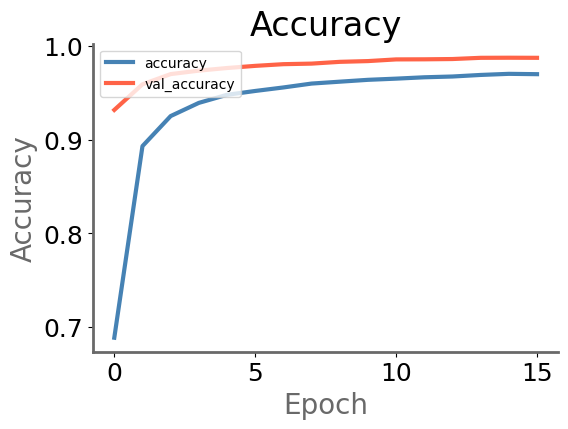

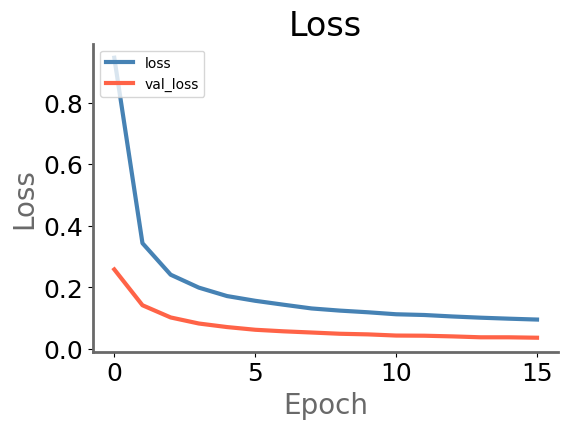

In [11]:
fidle.scrawler.history(history, figsize=(6,4), save_as='03-history')

### 6.3 - Plot results

  1/313 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


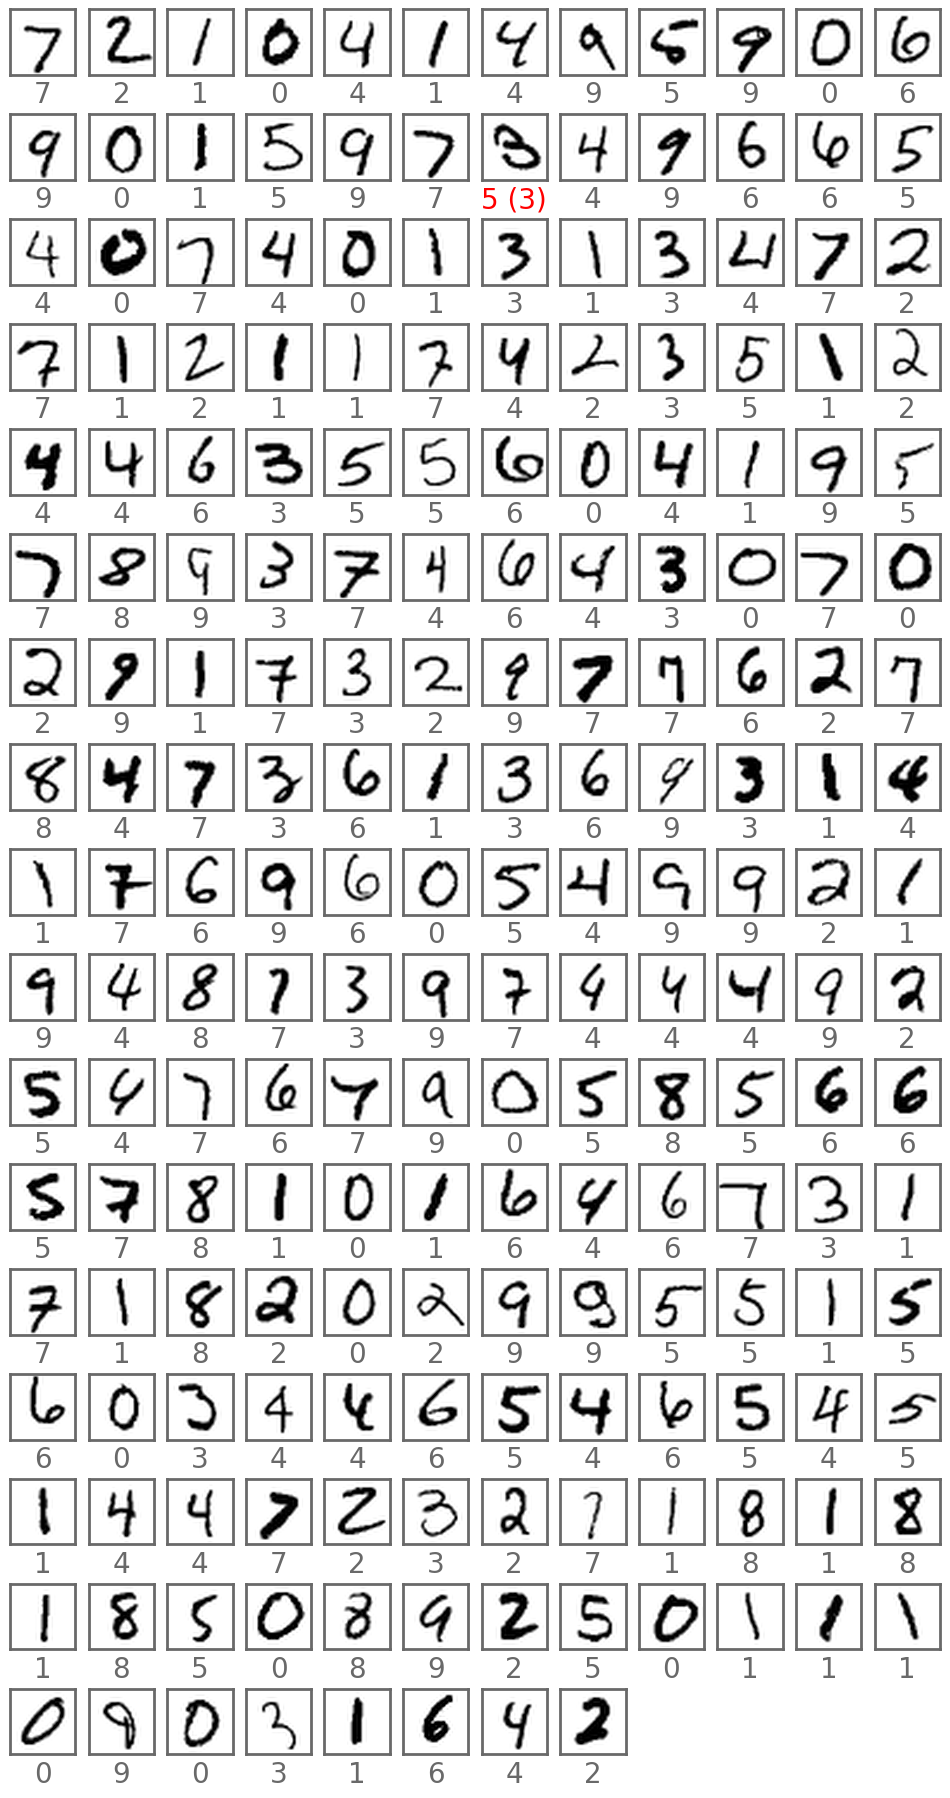

In [12]:
#y_pred   = model.predict_classes(x_test)           Deprecated after 01/01/2021 !!

y_sigmoid = model.predict(x_test, verbose=fit_verbosity)
y_pred    = np.argmax(y_sigmoid, axis=-1)

fidle.scrawler.images(x_test, y_test, range(0,200), columns=12, x_size=1, y_size=1, y_pred=y_pred, save_as='04-predictions')

### 6.4 - Plot some errors

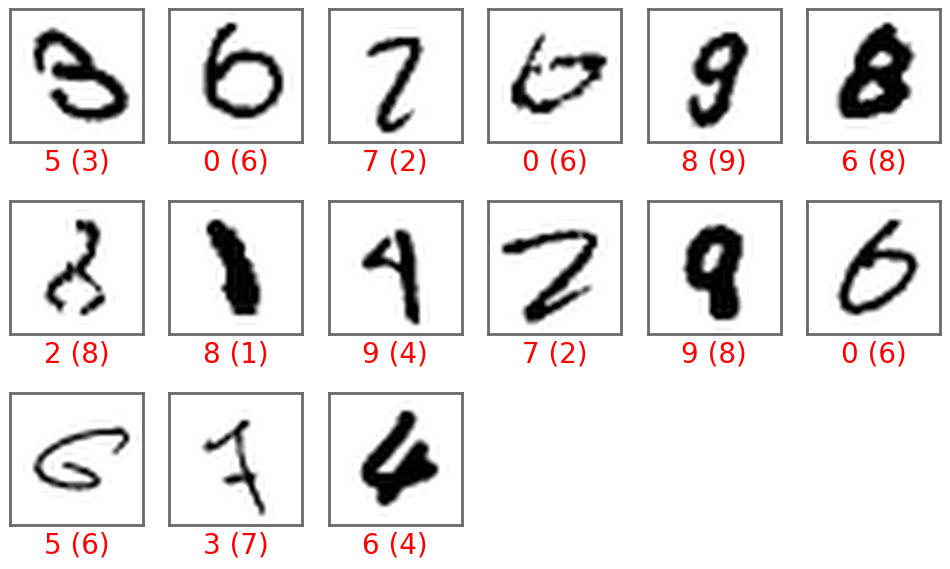

In [13]:
errors=[ i for i in range(len(x_test)) if y_pred[i]!=y_test[i] ]
errors=errors[:min(24,len(errors))]
fidle.scrawler.images(x_test, y_test, errors[:15], columns=6, x_size=2, y_size=2, y_pred=y_pred, save_as='05-some-errors')

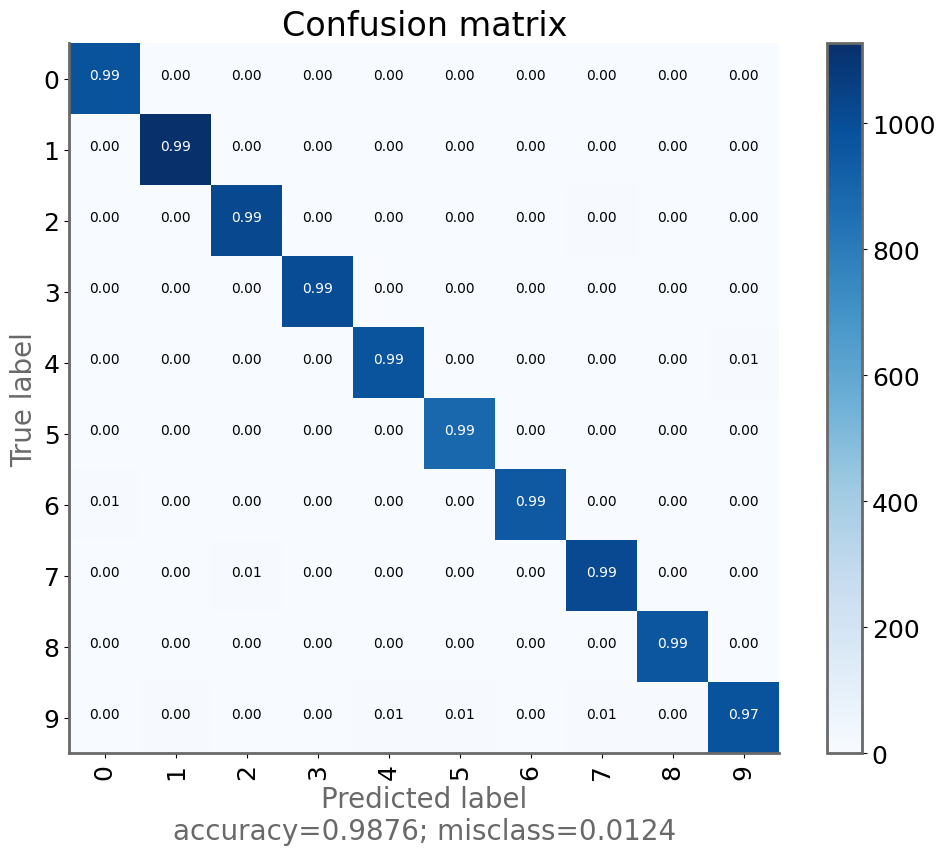

In [14]:
fidle.scrawler.confusion_matrix(y_test,y_pred,range(10),normalize=True, save_as='06-confusion-matrix')

In [15]:
fidle.end()

**End time :** 04/07/24 16:13:16  
**Duration :** 00:05:23 513ms  
This notebook ends here :-)  
[https://fidle.cnrs.fr](https://fidle.cnrs.fr)

<div class="todo">
    A few things you can do for fun:
    <ul>
        <li>Changing the network architecture (layers, number of neurons, etc.)</li>
        <li>Display a summary of the network</li>
        <li>Retrieve and display the softmax output of the network, to evaluate its "doubts".</li>
    </ul>
</div>

---
<img width="80px" src="../fidle/img/logo-paysage.svg"></img>